In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
df = pd.read_csv('/content/WELFake_Dataset.csv')
df.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [ ]:
# #Word Cloud
# text = ''
# for news in df.text.values:
#     text += f" {news}"
# wordcloud = WordCloud(
#     width = 2500,
#     height = 2000,
#     background_color = 'black',
#     stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
# fig = plt.figure(
#     figsize = (40, 30),
#     facecolor = 'k',
#     edgecolor = 'k')
# plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.tight_layout(pad=0)
# plt.show()
# del text

In [ ]:
empty_fake_index = [index for index,text in enumerate(df.text.values) if str(text).strip() == '']
print(f"No of empty rows: {len(empty_fake_index)}")
df.iloc[empty_fake_index].tail()

No of empty rows: 744


,Unnamed: 0,title,text,label
71771,71771,WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...,,1
71914,71914,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,1
72026,72026,BOOM! Woman Tries To Steal TRUMP Signs BUT Thi...,,1
72119,72119,BILL O’REILLY Destroys Liberal Pundit On Trump...,,1
72125,72125,WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...,,1


In [ ]:
df.drop(empty_fake_index, axis=0,inplace=True)

In [ ]:
df["text"] = df["title"] + " " + df["text"]
df = df.drop([ "title"], axis=1)
df.head()

,Unnamed: 0,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1
1,1,NaN,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",0
4,4,SATAN 2: Russia unvelis an image of its terrif...,1


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
y = df["label"].values
#Converting X to format acceptable by gensim, removing annd punctuation stopwords in the process
X = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
X = [
    [tok for tok in tokenizer.tokenize(doc.lower())
     if tok not in stop_words and len(tok) > 1]
    for doc in df['text'].astype(str).values
]

del df

In [ ]:

import numpy as np
import gensim


In [ ]:
EMBEDDING_DIM = 100

# Creating Word Vectors by Word2Vec Method (takes time...)
# Replacing 'size' with 'vector_size' to specify embedding dimension
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=EMBEDDING_DIM, window=5, min_count=1)

In [ ]:
#vocab size
len(w2v_model.wv.key_to_index)
w2v_model.wv["house"]
w2v_model.wv.most_similar("trump")
w2v_model.wv.most_similar("america")
w2v_model.wv.most_similar("fbi")
w2v_model.wv.most_similar("google")
w2v_model.wv.most_similar(positive=["trump","obama", "clinton"])

[('bush', 0.5912476181983948),
 ('elect', 0.5645204186439514),
 ('hillary', 0.5516294836997986),
 ('sanders', 0.5513218641281128),
 ('even', 0.5239704251289368),
 ('yet', 0.5210606455802917),
 ('donald', 0.5160003900527954),
 ('cruz', 0.5098075866699219),
 ('democrats', 0.5030076503753662),
 ('romney', 0.5018689036369324)]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

In [ ]:
# lets check the first 10 words of first news
#every word has been represented with a number
X[0][:10]

[56, 588, 192, 3962, 399, 1186, 2288, 2952, 144128, 9489]

In [ ]:
word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 10:
        break

said -> 1
trump -> 2
would -> 3
president -> 4
people -> 5
one -> 6
new -> 7
clinton -> 8
mr -> 9
state -> 10


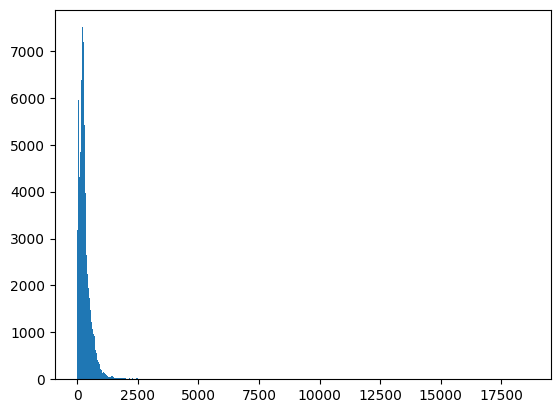

In [ ]:
plt.hist([len(x) for x in X], bins=500)
plt.show()


In [ ]:
nos = np.array([len(x) for x in X])
len(nos[nos  < 700])

65812

In [ ]:
maxlen = 700

#Making all news of size maxlen defined above
X = pad_sequences(X, maxlen=maxlen)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        try:
            # model[word] should be replaced with model.wv[word] to get the vector
            weight_matrix[i] = model.wv[word]
        except KeyError:
            # Handle words not found in the model's vocabulary
            weight_matrix[i] = np.zeros(EMBEDDING_DIM)
    return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(w2v_model, word_index)

In [ ]:
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
#LSTM
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

del embedding_vectors
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │    24,390,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,390,000 (93.04 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 24,390,000 (93.04 MB)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=3)

Epoch 1/3
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 785s 669ms/step - acc: 0.8890 - loss: 0.2678 - val_acc: 0.9541 - val_loss: 0.1243
Epoch 2/3
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 773s 660ms/step - acc: 0.9494 - loss: 0.1338 - val_acc: 0.9607 - val_loss: 0.1072
Epoch 3/3
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 783s 668ms/step - acc: 0.9444 - loss: 0.1412 - val_acc: 0.9635 - val_loss: 0.0936


In [ ]:
y_pred = (model.predict(X_test) >= 0.5).astype("int")

558/558 ━━━━━━━━━━━━━━━━━━━━ 112s 200ms/step


In [ ]:
accuracy_score(y_test, y_pred)

0.9636934110264456

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      8752
           1       0.98      0.95      0.96      9096

    accuracy                           0.96     17848
   macro avg       0.96      0.96      0.96     17848
weighted avg       0.96      0.96      0.96     17848



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[8544,  208],
       [ 440, 8656]])

Text(95.72222222222221, 0.5, 'Truth')

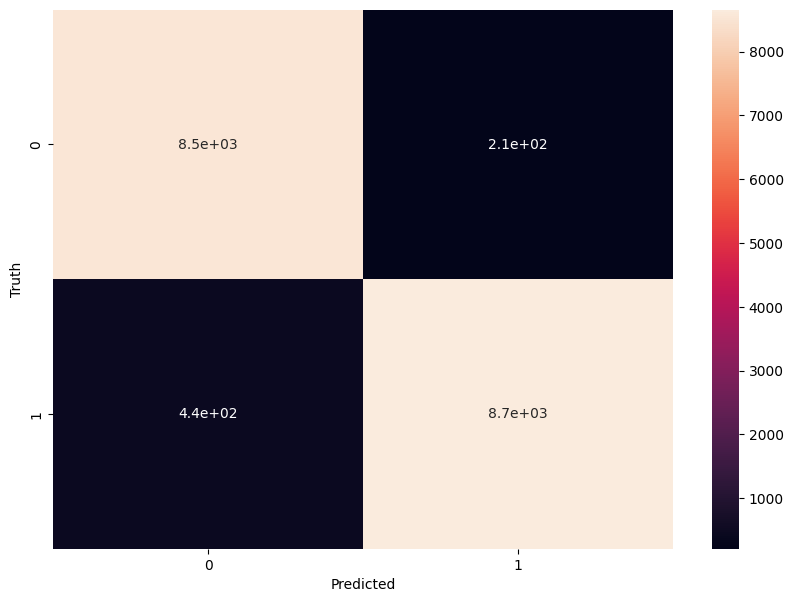

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')